___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving advertising.csv to advertising.csv


## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [ ]:
df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


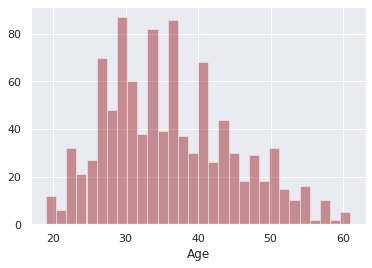

In [ ]:
sns.distplot(df['Age'],kde=False,color='darkred',bins=30)

**Create a jointplot showing Area Income versus Age.**

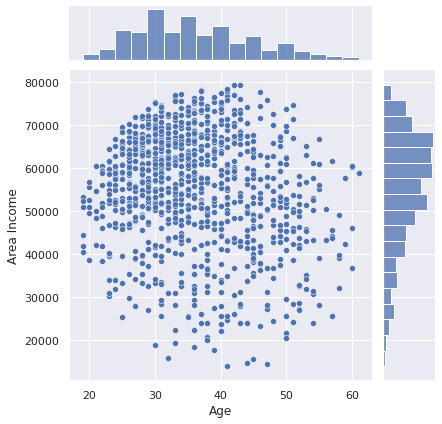

In [ ]:
sns.jointplot(x='Age',y='Area Income',data=df)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

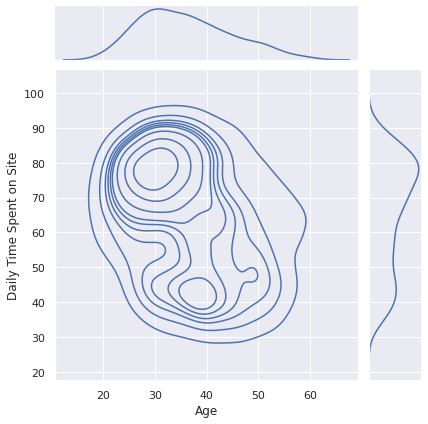

In [ ]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', kind = 'kde',data=df)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

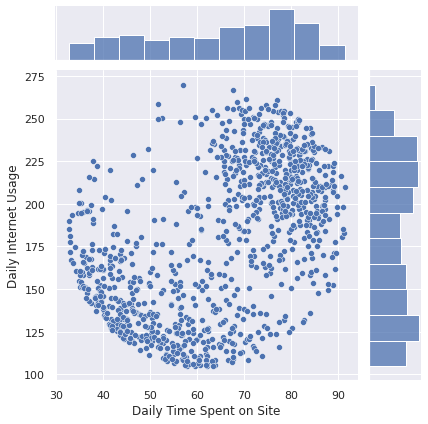

In [ ]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

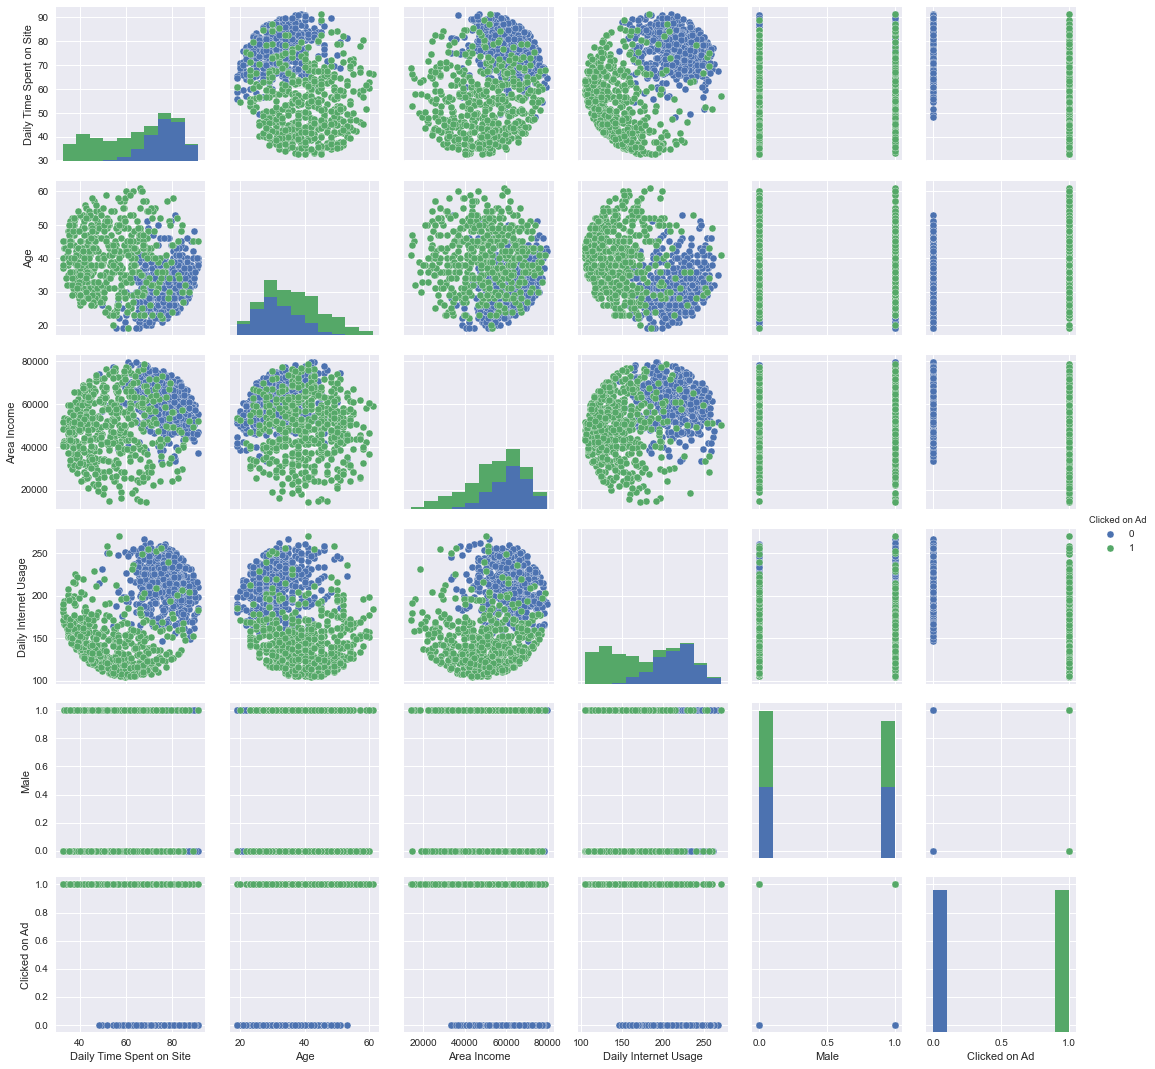

In [ ]:
sns.pairplot(df,hue='Clicked on Ad')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
len(df['Timestamp'].unique())

1000

In [ ]:
X = df.drop(['Clicked on Ad','Ad Topic Line','City', 'Country','Timestamp'], axis=1)
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
5,59.99,23,59761.56,226.74,1
6,88.91,33,53852.85,208.36,0
7,66.00,48,24593.33,131.76,1
8,74.53,30,68862.00,221.51,1
9,69.88,20,55642.32,183.82,1


In [ ]:
y = df['Clicked on Ad']
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     1
11     0
12     1
13     0
14     1
15     1
16     1
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     1
28     1
29     0
      ..
970    1
971    1
972    1
973    0
974    1
975    1
976    1
977    1
978    0
979    0
980    1
981    0
982    1
983    0
984    0
985    1
986    0
987    1
988    0
989    0
990    1
991    1
992    1
993    0
994    1
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
253,46.08,30,66784.81,164.63,1
667,79.61,31,58342.63,235.97,0
85,57.76,41,47861.93,105.15,0
969,63.04,27,69784.85,159.05,0
75,64.10,22,60465.72,215.93,0
786,74.07,22,50950.24,165.43,1
658,82.95,39,69805.70,201.29,0
465,45.70,33,67384.31,151.12,1
920,81.05,34,54045.39,245.50,0
38,50.43,46,57425.87,119.32,1


In [ ]:
y_train

253    1
667    0
85     1
969    1
75     0
786    0
658    0
465    1
920    0
38     1
944    1
725    0
436    0
140    0
818    0
602    1
745    1
471    0
342    0
416    1
711    0
557    0
50     0
162    0
765    1
856    0
867    0
524    0
443    1
172    0
      ..
72     1
845    1
537    0
677    1
849    1
983    0
174    1
87     1
551    0
486    0
705    0
314    0
396    1
600    1
472    0
70     1
599    1
804    1
754    0
277    0
723    0
9      0
359    0
707    0
763    1
835    0
192    1
629    0
559    0
684    1
Name: Clicked on Ad, Length: 750, dtype: int64

** Train and fit a logistic regression model on the training set.**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [ ]:

predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.92      0.89      0.90       114

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



## Great Job!